# Polynomial Prediction
 
 Given a polyniial $2x^3 - x^2 + x - 5$, plot the function with Gaussian noise. Use Chi-Squared, MLE, and TensorFlow to predict the polynomial equation and integration to assess accuracy
 

## Graphing Polynomial

[-1.         -0.85714286 -0.71428571 -0.57142857 -0.42857143 -0.28571429
 -0.14285714  0.          0.14285714  0.28571429  0.42857143  0.57142857
  0.71428571  0.85714286  1.        ]
[-9.         -7.85131195 -6.95335277 -6.27113703 -5.7696793  -5.41399417
 -5.16909621 -5.         -4.87172012 -4.74927114 -4.59766764 -4.3819242
 -4.06705539 -3.6180758  -3.        ]


Text(0.5, 1.0, 'Polynomial Regression')

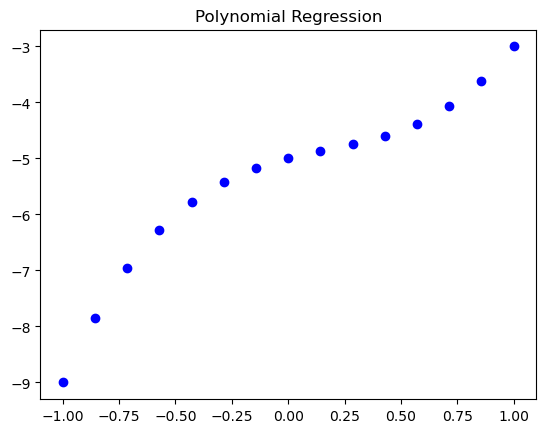

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2*(x**3) - (x**2) + x - 5

x_values = np.linspace(start = -1, stop = 1, num = 15)
print(x_values)

y_pred = f(x_values) # exact based on the polynomial
print(y_pred)

plt.scatter(x_values, y_pred, color = 'blue')
plt.title("Polynomial Regression")

## Chi Square 

Chi Squared is a statistic that measures how well the model fits the observed data.
 
$$
\chi^2 = \sum_{i=1}^{N} \frac{(y_{\text{observed},i} - y_{\text{model},i})^2}{\sigma_i^2}

$$

To find the best-fitting polynomial, we want to minimize $\chi^2$. To do this, we can use `scipy.optimize.minimize()`

X values: [-1.         -0.85714286 -0.71428571 -0.57142857 -0.42857143 -0.28571429
 -0.14285714  0.          0.14285714  0.28571429  0.42857143  0.57142857
  0.71428571  0.85714286  1.        ]
Y True: [-9.         -7.85131195 -6.95335277 -6.27113703 -5.7696793  -5.41399417
 -5.16909621 -5.         -4.87172012 -4.74927114 -4.59766764 -4.3819242
 -4.06705539 -3.6180758  -3.        ]
Y Observed: [-9.150441   -7.8590371  -7.0316885  -6.33710983 -5.84497603 -5.21666146
 -5.25289081 -5.28708301 -5.02073057 -4.88634306 -4.59236052 -4.42202385
 -4.09735585 -3.47017281 -2.94449348]
Best-fit parameters (Chi-Squared Minimization): [ 2.22139751 -0.9001144   0.90475964 -5.08465714]


array([ 2.22139751, -0.9001144 ,  0.90475964, -5.08465714])

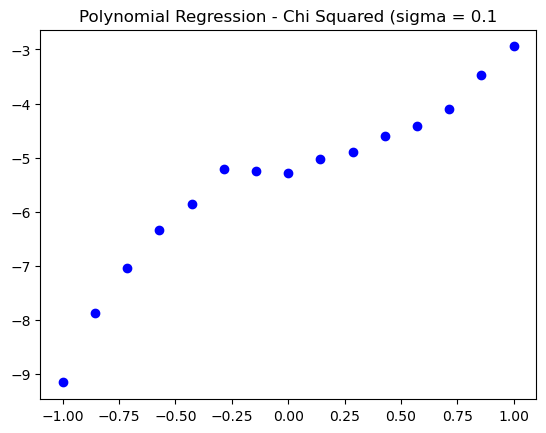

In [2]:
from PolynomialRegressionChiSquared import PolynomialRegressionChiSquared
chi_sq = PolynomialRegressionChiSquared(sigma = 0.1)
print(f"X values: {chi_sq.x_values}")
print(f"Y True: {chi_sq.y_true}")
print(f"Y Observed: {chi_sq.y_observed}")

plt.scatter(chi_sq.x_values, chi_sq.y_observed, color = 'blue')
plt.title("Polynomial Regression - Chi Squared (sigma = 0.1)")

chi_sq.minimize_chi_square()



### Chi - Squared Regression 


In [ ]:
# Example 

from PolynomialRegressionChiSquared import PolynomialRegressionChiSquared
chi_sq = PolynomialRegressionChiSquared(sigma = 0.1)
print(f"X values: {chi_sq.x_values}")
print(f"Y True: {chi_sq.y_true}")
print(f"Y Observed: {chi_sq.y_observed}")

plt.scatter(chi_sq.x_values, chi_sq.y_observed, color = 'blue')
plt.title("Polynomial Regression - Chi Squared (sigma = 0.1")

chi_sq.minimize_chi_square()



Best-fit parameters (Chi-Squared Minimization): [ 2.18242757 -0.97634234  0.84945455 -4.98815387]
Area estimation using Simpson's method: 0.21053568217438487
Area estimation using Trapezoidal method: 0.195101849376239


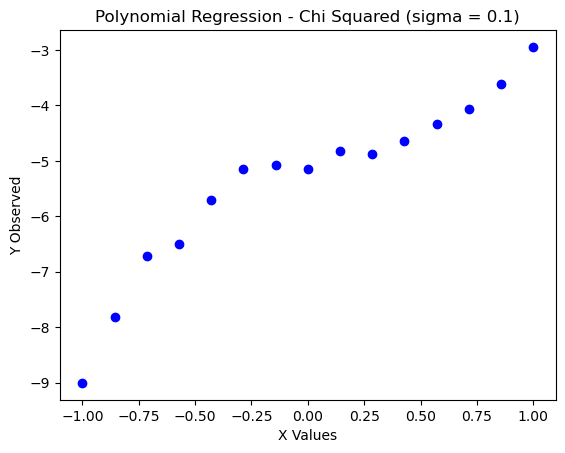

Best-fit parameters (Chi-Squared Minimization): [ 1.74931123 -1.35739687  0.95955945 -4.76182157]
Area estimation using Simpson's method: 0.33202157343079947
Area estimation using Trapezoidal method: 0.41958812761555053


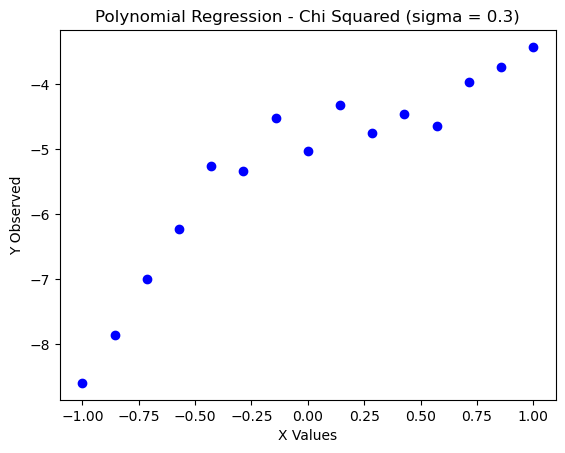

Best-fit parameters (Chi-Squared Minimization): [ 1.7166136  -0.84147529  1.19634045 -5.11566668]
Area estimation using Simpson's method: 0.9308231082246452
Area estimation using Trapezoidal method: 0.9522873671608196


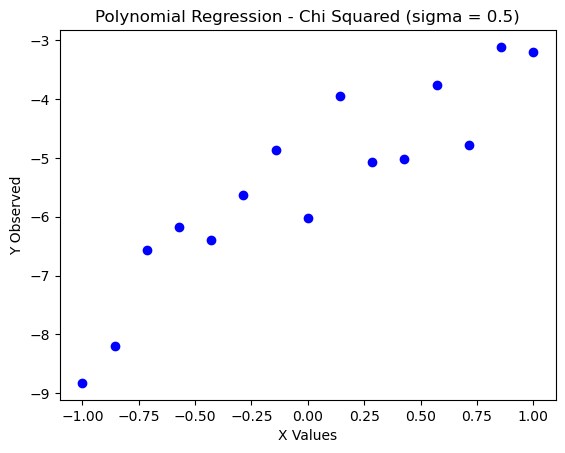

Best-fit parameters (Chi-Squared Minimization): [ 1.98039656 -1.31025713  0.82293328 -4.99769867]
Area estimation using Simpson's method: 1.1041156761285396
Area estimation using Trapezoidal method: 1.1902301362353236


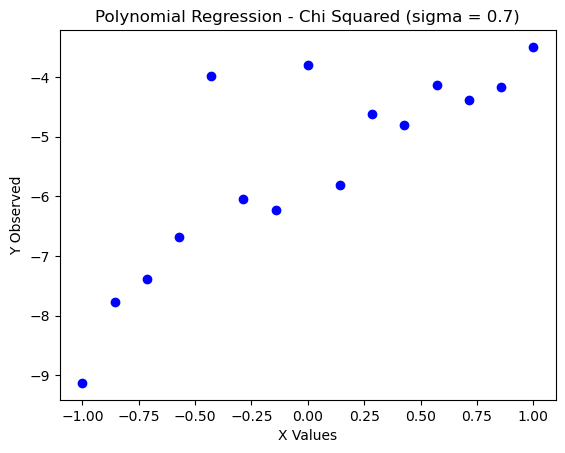

Best-fit parameters (Chi-Squared Minimization): [-0.03843839 -1.01277794  2.18202403 -4.52146592]
Area estimation using Simpson's method: 1.5653818963238575
Area estimation using Trapezoidal method: 1.8029555672932782


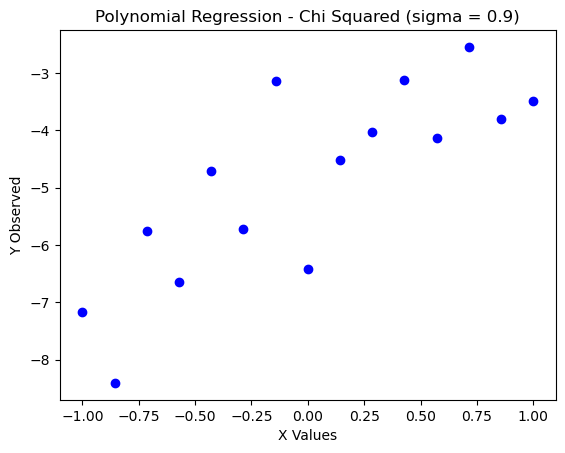

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PolynomialRegressionChiSquared import PolynomialRegressionChiSquared
from scipy.integrate import simps
from scipy.integrate import trapz



## arrays to hold area
chi_sq_simps = np.zeros(5)
chi_sq_trapz = np.zeros(5)


# Define constants
SIGMA_START = 0.1
SIGMA_END = 0.9
SIGMA_STEP = 0.2


# Loop over the range of sigma values
for i, sigma in enumerate(np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP)):    
    # Create a PolynomialRegressionChiSquared object
    chi_sq = PolynomialRegressionChiSquared(sigma=sigma)
    
    # Plot the observed data
    plt.figure()  # Create a new figure
    plt.scatter(chi_sq.x_values, chi_sq.y_observed, color='blue')
    
    # Set title and labels
    plt.title(f"Polynomial Regression - Chi Squared (sigma = {sigma:.1f})")
    plt.xlabel('X Values')
    plt.ylabel('Y Observed')
    
    # Minimize the chi-squared
    try:
        chi_sq.minimize_chi_square()  # Minimize function
    except Exception as e:
        print(f"Error in minimizing chi square for sigma = {sigma}: {e}")
    
    # Integration using Simpson's Rule
    chi_sq_simps[i] = simps(np.abs(chi_sq.y_true - chi_sq.y_observed), chi_sq.x_values)
    print(f"Area estimation using Simpson's method: {chi_sq_simps[i]}")
    
    # Integration using Trapezoidal Rule
    chi_sq_trapz[i] = trapz(np.abs(chi_sq.y_true - chi_sq.y_observed), chi_sq.x_values)
    print(f"Area estimation using Trapezoidal method: {chi_sq_trapz[i]}")

    # Show the plot inline
    plt.show()